<a href="https://colab.research.google.com/github/27hdu/Heart-Disease-Risk-Prediction-Using-Supervised-ML-Models/blob/main/Kaggledata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving cardiovasculardata.xlsx to cardiovasculardata.xlsx


In [ ]:
df=pd.read_excel('cardiovasculardata.xlsx')
df.head()

,id,age,gender,height in cm,weight in kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
df = df.drop('id', axis=1)

In [ ]:
print("New DataFrame shape:", df.shape)

New DataFrame shape: (70000, 12)


In [ ]:
df.drop(df[(df['ap_hi'] > df['ap_lo']) == False].index, inplace=True)

In [ ]:
df.head()

,age,gender,height in cm,weight in kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
columns_to_filter = ["ap_hi", "ap_lo", "weight in kg", "height in cm"]

lower_pct = 0.025
upper_pct = 0.975
mask = pd.Series(True, index=df.index)

for col in columns_to_filter:
    lower_bound = df[col].quantile(lower_pct)
    upper_bound = df[col].quantile(upper_pct)
    print(f"{col}: Keeping values between {lower_bound:.2f} and {upper_bound:.2f}")
    mask &= df[col].between(lower_bound, upper_bound)

df_filtered = df[mask].reset_index(drop=True)

print("\nFiltered DataFrame:")
print(df_filtered)

ap_hi: Keeping values between 100.00 and 160.93
ap_lo: Keeping values between 60.00 and 100.00
weight in kg: Keeping values between 51.00 and 107.00
height in cm: Keeping values between 150.00 and 180.00

Filtered DataFrame:
         age  gender  height in cm  weight in kg  ap_hi  ap_lo  cholesterol  \
0      18393       2           168            62    110     80            1   
1      20228       1           156            85    140     90            3   
2      18857       1           165            64    130     70            3   
3      17623       2           169            82    150    100            1   
4      17474       1           156            56    100     60            1   
...      ...     ...           ...           ...    ...    ...          ...   
60435  19699       1           172            70    130     90            1   
60436  21074       1           165            80    150     80            1   
60437  19240       2           168            76    120     80  

In [ ]:
def remove_outliers_quantile(df, columns, lower=0.025, upper=0.975):
    mask = pd.Series(True, index=df.index)
    for col in columns:
        lb, ub = df[col].quantile(lower), df[col].quantile(upper)
        mask &= df[col].between(lb, ub)
    return df[mask].reset_index(drop=True)

df_filtered = remove_outliers_quantile(df, columns_to_filter)


In [ ]:
print("After removal of Outlier in DataFrame the shape:", df_filtered.shape)

After removal of Outlier in DataFrame the shape: (60440, 12)


In [ ]:
df_filtered['age'] = (df_filtered['age'] / 365.25).round().astype(int)


In [ ]:
df_filtered.head()

,age,gender,height in cm,weight in kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
print(df_filtered.describe())

                age        gender  height in cm  weight in kg         ap_hi  \
count  60440.000000  60440.000000  60440.000000  60440.000000  60440.000000   
mean      53.300761      1.346923    164.537508     73.393977    125.753921   
std        6.742116      0.475995      6.838938     11.734714     13.766388   
min       30.000000      1.000000    150.000000     51.000000    100.000000   
25%       48.000000      1.000000    160.000000     65.000000    120.000000   
50%       54.000000      1.000000    165.000000     72.000000    120.000000   
75%       58.000000      2.000000    169.000000     80.000000    135.000000   
max       65.000000      2.000000    180.000000    107.000000    160.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  60440.000000  60440.000000  60440.000000  60440.000000  60440.000000   
mean      81.036962      1.351009      1.219937      0.085639      0.051919   
std        8.245763      0.670065      0.567217    

In [ ]:
df_filtered.head()

,age,gender,height in cm,weight in kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
# BMI
df_filtered["Height_m"] = df_filtered["height in cm"] / 100
df_filtered["BMI"] = df_filtered["weight in kg"] / (df_filtered["Height_m"] ** 2)

# MAP
df_filtered["MAP"] = (2 * df_filtered["ap_lo"] + df_filtered["ap_hi"]) / 3


In [ ]:
age_col_name = "age"

age_bins = [30, 35, 40, 45, 50, 55, 60, 65]
df_filtered["Age_Class"] = pd.cut(
    df_filtered[age_col_name],
    bins=age_bins,
    labels=range(len(age_bins) - 1),
    right=True,
)

In [ ]:
# BMI bins
bmi_bins = [0, 18.5, 25, 30, 35, 40, float("inf")]
df_filtered["BMI_Class"] = pd.cut(df_filtered["BMI"], bins=bmi_bins, labels=range(6))

# MAP bins
map_bins = [0, 70, 80, 90, 100, 110, float("inf")]
df_filtered["MAP_Class"] = pd.cut(df_filtered["MAP"], bins=map_bins, labels=range(6))

In [ ]:
df_filtered.head()

,age,gender,height in cm,weight in kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Height_m,BMI,MAP,Age_Class,BMI_Class,MAP_Class
0,50,2,168,62,110,80,1,1,0,0,1,0,1.68,21.967120,90.000000,3,1,2
1,55,1,156,85,140,90,3,1,0,0,1,1,1.56,34.927679,106.666667,4,3,4
2,52,1,165,64,130,70,3,1,0,0,0,1,1.65,23.507805,90.000000,4,1,2
3,48,2,169,82,150,100,1,1,0,0,1,1,1.69,28.710479,116.666667,3,2,5
4,48,1,156,56,100,60,1,1,0,0,0,0,1.56,23.011177,73.333333,3,1,1


In [ ]:
cols_to_drop = [
    "age",
    "height in cm",
    "weight in kg",
    "ap_hi",
    "ap_lo",
    "Height_m",
    "BMI",
    "MAP",
]

df_filtered.drop(columns=cols_to_drop, inplace=True)

print("\n✅ Continuous variables dropped. Preview of cleaned DataFrame:")
print(df_filtered.head())



✅ Continuous variables dropped. Preview of cleaned DataFrame:
   gender  cholesterol  gluc  smoke  alco  active  cardio Age_Class BMI_Class  \
0       2            1     1      0     0       1       0         3         1   
1       1            3     1      0     0       1       1         4         3   
2       1            3     1      0     0       0       1         4         1   
3       2            1     1      0     0       1       1         3         2   
4       1            1     1      0     0       0       0         3         1   

  MAP_Class  
0         2  
1         4  
2         2  
3         5  
4         1  


In [ ]:
pip install kmodes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes


In [ ]:
male_df = df_filtered[df_filtered["gender"] == 1].copy()
female_df = df_filtered[df_filtered["gender"] == 2].copy()


In [ ]:
def plot_kmodes_elbow(df, max_k=5, title="Elbow Method"):
    cost = []
    K = range(1, max_k + 1)
    for k in K:
        km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
        km.fit_predict(df)
        cost.append(km.cost_)
    plt.figure(figsize=(6, 4))
    plt.plot(K, cost, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Cost')
    plt.title(title)
    plt.show()



🔹 Elbow curve for Male dataset:


/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3

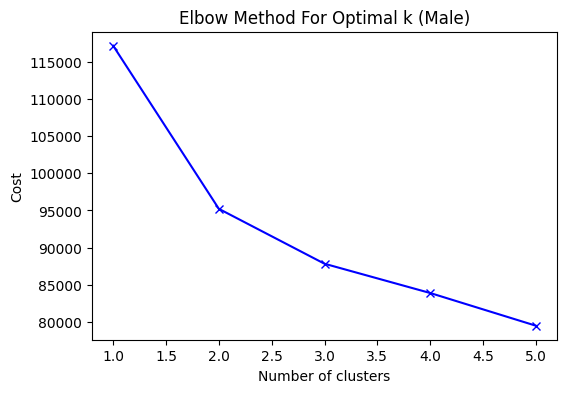


🔹 Elbow curve for Female dataset:


/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3

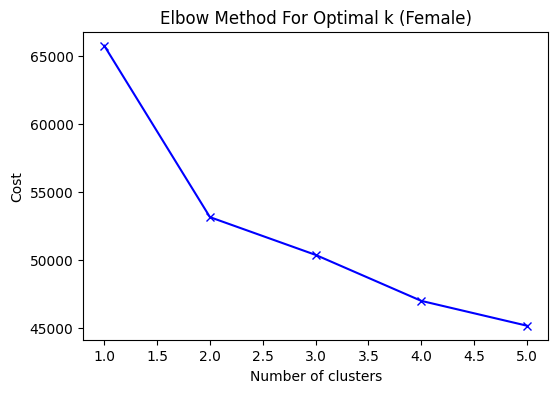

In [ ]:
print("\n🔹 Elbow curve for Male dataset:")
plot_kmodes_elbow(
    male_df.drop(columns=["gender"]),
    max_k=5,
    title="Elbow Method For Optimal k (Male)"
)

print("\n🔹 Elbow curve for Female dataset:")
plot_kmodes_elbow(
    female_df.drop(columns=["gender"]),
    max_k=5,
    title="Elbow Method For Optimal k (Female)"
)


In [ ]:

km_male = KModes(n_clusters=2, init='Huang', n_init=5, verbose=0)
male_clusters = km_male.fit_predict(male_df.drop(columns=["gender"]))
male_df["Cluster"] = male_clusters

km_female = KModes(n_clusters=2, init='Huang', n_init=5, verbose=0)
female_clusters = km_female.fit_predict(female_df.drop(columns=["gender"]))
female_df["Cluster"] = female_clusters


/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


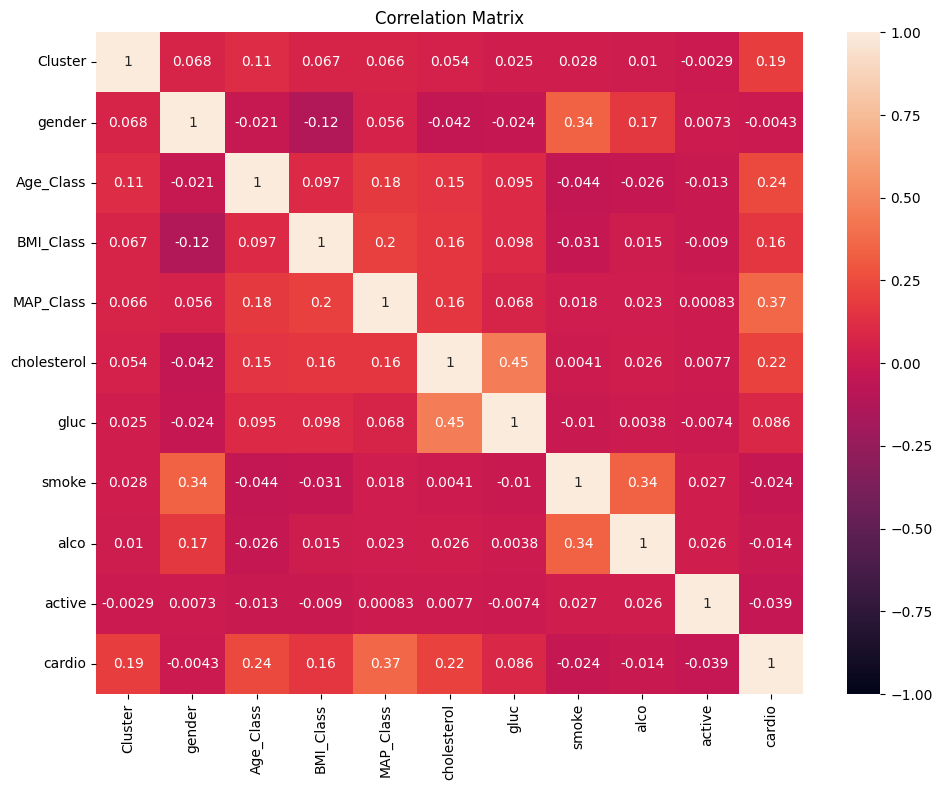

In [ ]:
import seaborn as sns

combined_df = pd.concat([male_df, female_df], ignore_index=True)


corr_features = [
    "Cluster", "gender", "Age_Class", "BMI_Class", "MAP_Class",
    "cholesterol", "gluc", "smoke", "alco", "active", "cardio"
]

corr_matrix = combined_df[corr_features].corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="rocket", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [ ]:

X = combined_df.drop(columns=["cardio", "Cluster"])

# Target: cardio
y = combined_df["cardio"]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    print(f"\n📊 {model_name} Results:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_enc, y_train)
dtree_preds = dtree.predict(X_test_enc)
evaluate_model(y_test, dtree_preds, "Decision Tree")



📊 Decision Tree Results:
Accuracy:  0.6911
Precision: 0.6943
Recall:    0.6911
F1-score:  0.6888


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500, max_depth=4, random_state=42
)
rf.fit(X_train_enc, y_train)
rf_preds = rf.predict(X_test_enc)
evaluate_model(y_test, rf_preds, "Random Forest")



📊 Random Forest Results:
Accuracy:  0.7009
Precision: 0.7139
Recall:    0.7009
F1-score:  0.6947


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train_enc)
X_test_imputed = imputer.transform(X_test_enc)


mlp = MLPClassifier(
    hidden_layer_sizes=(50, 30), max_iter=300, random_state=42
)
mlp.fit(X_train_imputed, y_train)
mlp_preds = mlp.predict(X_test_imputed)
evaluate_model(y_test, mlp_preds, "Multilayer Perceptron")


📊 Multilayer Perceptron Results:
Accuracy:  0.7062
Precision: 0.7080
Recall:    0.7062
F1-score:  0.7048


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=4,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)
xgb.fit(X_train_enc, y_train)
xgb_preds = xgb.predict(X_test_enc)
evaluate_model(y_test, xgb_preds, "XGBoost")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:06:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 XGBoost Results:
Accuracy:  0.7128
Precision: 0.7155
Recall:    0.7128
F1-score:  0.7111


In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train_enc)
X_test_imputed = imputer.transform(X_test_enc)

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_imputed, y_train)
svm_preds = svm.predict(X_test_imputed)
svm_probs = svm.predict_proba(X_test_imputed)[:, 1]

evaluate_model(y_test, svm_preds, "SVM")



📊 SVM Results:
Accuracy:  0.7072
Precision: 0.7112
Recall:    0.7072
F1-score:  0.7049


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train_enc)
X_test_imputed = imputer.transform(X_test_enc)

logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_imputed, y_train)
logreg_preds = logreg.predict(X_test_imputed)
logreg_probs = logreg.predict_proba(X_test_imputed)[:, 1]

evaluate_model(y_test, logreg_preds, "Logistic Regression")



📊 Logistic Regression Results:
Accuracy:  0.7010
Precision: 0.7015
Recall:    0.7010
F1-score:  0.7004


In [ ]:
importances = rf.feature_importances_
feature_names = X.columns

for name, importance in sorted(zip(feature_names, importances), key=lambda x: -x[1]):
    print(f"{name}: {importance:.4f}")


MAP_Class: 0.6184
cholesterol: 0.1656
Age_Class: 0.1591
BMI_Class: 0.0397
gluc: 0.0115
active: 0.0037
smoke: 0.0009
alco: 0.0006
gender: 0.0005


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


In [ ]:
from sklearn.metrics import classification_report

def detailed_report(y_true, y_pred, model_name):
    print(f"\n📑 Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=["No Cardio", "Cardio"]))


In [ ]:
dtree_probs = dtree.predict_proba(X_test_enc)[:, 1]
detailed_report(y_test, dtree_preds, "Decision Tree")



📑 Classification Report for Decision Tree:
              precision    recall  f1-score   support

   No Cardio       0.67      0.77      0.72      6190
      Cardio       0.72      0.61      0.66      5898

    accuracy                           0.69     12088
   macro avg       0.69      0.69      0.69     12088
weighted avg       0.69      0.69      0.69     12088



In [ ]:
svm_probs = svm.predict_proba(X_test_enc)[:, 1]
detailed_report(y_test, svm_preds, "SVM")


📑 Classification Report for SVM:
              precision    recall  f1-score   support

   No Cardio       0.69      0.79      0.73      6190
      Cardio       0.74      0.62      0.67      5898

    accuracy                           0.71     12088
   macro avg       0.71      0.71      0.70     12088
weighted avg       0.71      0.71      0.70     12088



In [ ]:
logreg_probs = logreg.predict_proba(X_test_enc)[:, 1]
detailed_report(y_test, logreg_preds, "Logistic Regression")


📑 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   No Cardio       0.70      0.74      0.72      6190
      Cardio       0.71      0.66      0.68      5898

    accuracy                           0.70     12088
   macro avg       0.70      0.70      0.70     12088
weighted avg       0.70      0.70      0.70     12088



In [ ]:
rf_probs = rf.predict_proba(X_test_enc)[:, 1]
detailed_report(y_test, rf_preds, "Random Forest")



📑 Classification Report for Random Forest:
              precision    recall  f1-score   support

   No Cardio       0.67      0.84      0.74      6190
      Cardio       0.76      0.56      0.65      5898

    accuracy                           0.70     12088
   macro avg       0.72      0.70      0.69     12088
weighted avg       0.71      0.70      0.69     12088



In [ ]:
mlp_probs = mlp.predict_proba(X_test_enc)[:, 1]
detailed_report(y_test, mlp_preds, "Multilayer Perceptron")



📑 Classification Report for Multilayer Perceptron:
              precision    recall  f1-score   support

   No Cardio       0.69      0.77      0.73      6190
      Cardio       0.72      0.64      0.68      5898

    accuracy                           0.71     12088
   macro avg       0.71      0.70      0.70     12088
weighted avg       0.71      0.71      0.70     12088



In [ ]:
xgb_probs = xgb.predict_proba(X_test_enc)[:, 1]
detailed_report(y_test, xgb_preds, "XGBoost")



📑 Classification Report for XGBoost:
              precision    recall  f1-score   support

   No Cardio       0.70      0.78      0.74      6190
      Cardio       0.74      0.64      0.68      5898

    accuracy                           0.71     12088
   macro avg       0.72      0.71      0.71     12088
weighted avg       0.72      0.71      0.71     12088



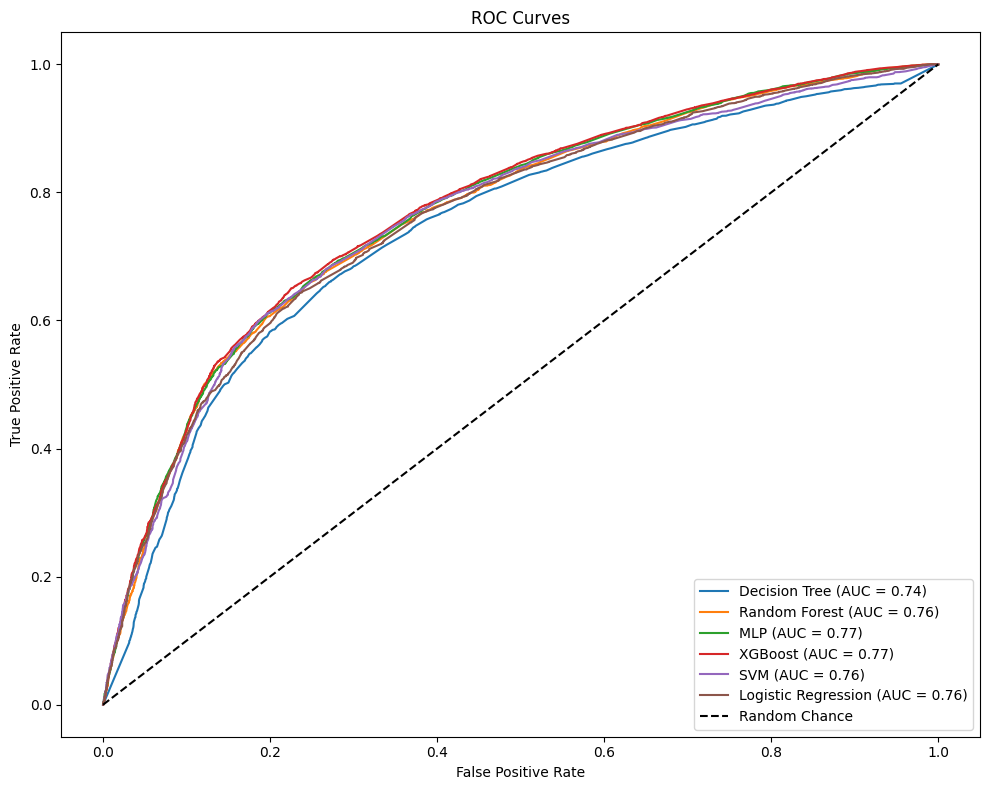

In [ ]:
plt.figure(figsize=(10, 8))

# models
plot_roc_curve(y_test, dtree_probs, "Decision Tree")
plot_roc_curve(y_test, rf_probs, "Random Forest")
plot_roc_curve(y_test, mlp_probs, "MLP")
plot_roc_curve(y_test, xgb_probs, "XGBoost")
plot_roc_curve(y_test, svm_probs, "SVM")
plot_roc_curve(y_test, logreg_probs, "Logistic Regression")

# reference line
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
dtree_params = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"],
}

dtree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dtree_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
dtree_grid.fit(X_train_enc, y_train)

print("✅ Best Decision Tree Params:", dtree_grid.best_params_)
dtree_best = dtree_grid.best_estimator_
evaluate_model(y_test, dtree_best.predict(X_test_enc), "Tuned Decision Tree")


✅ Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 10}

📊 Tuned Decision Tree Results:
Accuracy:  0.7073
Precision: 0.7118
Recall:    0.7073
F1-score:  0.7048


In [ ]:
rf_params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [4, 6, 8],
    "min_samples_split": [2, 5],
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
rf_grid.fit(X_train_enc, y_train)

print("✅ Best Random Forest Params:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
evaluate_model(y_test, rf_best.predict(X_test_enc), "Tuned Random Forest")


✅ Best Random Forest Params: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 500}

📊 Tuned Random Forest Results:
Accuracy:  0.7094
Precision: 0.7142
Recall:    0.7094
F1-score:  0.7068


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

mlp_params = {
    "hidden_layer_sizes": [(50,), (50, 30), (100,)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001],
}

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train_enc)

mlp_grid = GridSearchCV(
    MLPClassifier(max_iter=300, random_state=42),
    mlp_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
mlp_grid.fit(X_train_imputed, y_train)

print("✅ Best MLP Params:", mlp_grid.best_params_)
mlp_best = mlp_grid.best_estimator_

X_test_imputed = imputer.transform(X_test_enc)
evaluate_model(y_test, mlp_best.predict(X_test_imputed), "Tuned MLP")

✅ Best MLP Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}

📊 Tuned MLP Results:
Accuracy:  0.7081
Precision: 0.7085
Recall:    0.7081
F1-score:  0.7075


In [60]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 6],
    "n_estimators": [100, 300],
}

xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    xgb_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
xgb_grid.fit(X_train_enc, y_train)

print("✅ Best XGBoost Params:", xgb_grid.best_params_)
xgb_best = xgb_grid.best_estimator_
evaluate_model(y_test, xgb_best.predict(X_test_enc), "Tuned XGBoost")


✅ Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

📊 Tuned XGBoost Results:
Accuracy:  0.7120
Precision: 0.7153
Recall:    0.7120
F1-score:  0.7101


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

logreg_params = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],  # supports l1
}


imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train_enc)

logreg_grid = GridSearchCV(
    LogisticRegression(max_iter=500, random_state=42),
    logreg_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
logreg_grid.fit(X_train_imputed, y_train)

print("✅ Best Logistic Regression Params:", logreg_grid.best_params_)
logreg_best = logreg_grid.best_estimator_

X_test_imputed = imputer.transform(X_test_enc)
evaluate_model(y_test, logreg_best.predict(X_test_imputed), "Tuned Logistic Regression")

✅ Best Logistic Regression Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

📊 Tuned Logistic Regression Results:
Accuracy:  0.7019
Precision: 0.7024
Recall:    0.7019
F1-score:  0.7012


In [62]:
import numpy as np
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import loguniform

subset_size = 10000
X_subset, _, y_subset, _ = train_test_split(
    X_train_enc, y_train,
    train_size=subset_size,
    stratify=y_train,
    random_state=42
)


imputer = SimpleImputer(strategy='most_frequent')
X_train_subset_imputed = imputer.fit_transform(X_subset)
X_test_imputed = imputer.transform(X_test_enc)


svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    print(f"\n📊 {model_name} Results:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")


svm_grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    svm_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
svm_grid.fit(X_train_subset_imputed, y_subset)


print("✅ Best SVM Params:", svm_grid.best_params_)
svm_best = svm_grid.best_estimator_


y_pred_test = svm_best.predict(X_test_imputed)
evaluate_model(y_test, y_pred_test, "Tuned SVM (Subset-Trained)")



✅ Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

📊 Tuned SVM (Subset-Trained) Results:
Accuracy:  0.7080
Precision: 0.7123
Recall:    0.7080
F1-score:  0.7055


In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

dtree_probs = dtree_best.predict_proba(X_test_enc)[:, 1]
rf_probs = rf_best.predict_proba(X_test_enc)[:, 1]
mlp_probs = mlp_best.predict_proba(X_test_enc)[:, 1]
xgb_probs = xgb_best.predict_proba(X_test_enc)[:, 1]
svm_probs = svm_best.predict_proba(X_test_enc)[:,1]
logreg_probs = logreg_best.predict_proba(X_test_enc)[:, 1]


In [64]:
def plot_model_roc(y_true, y_probs, label):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC = {roc_auc:.2f})")


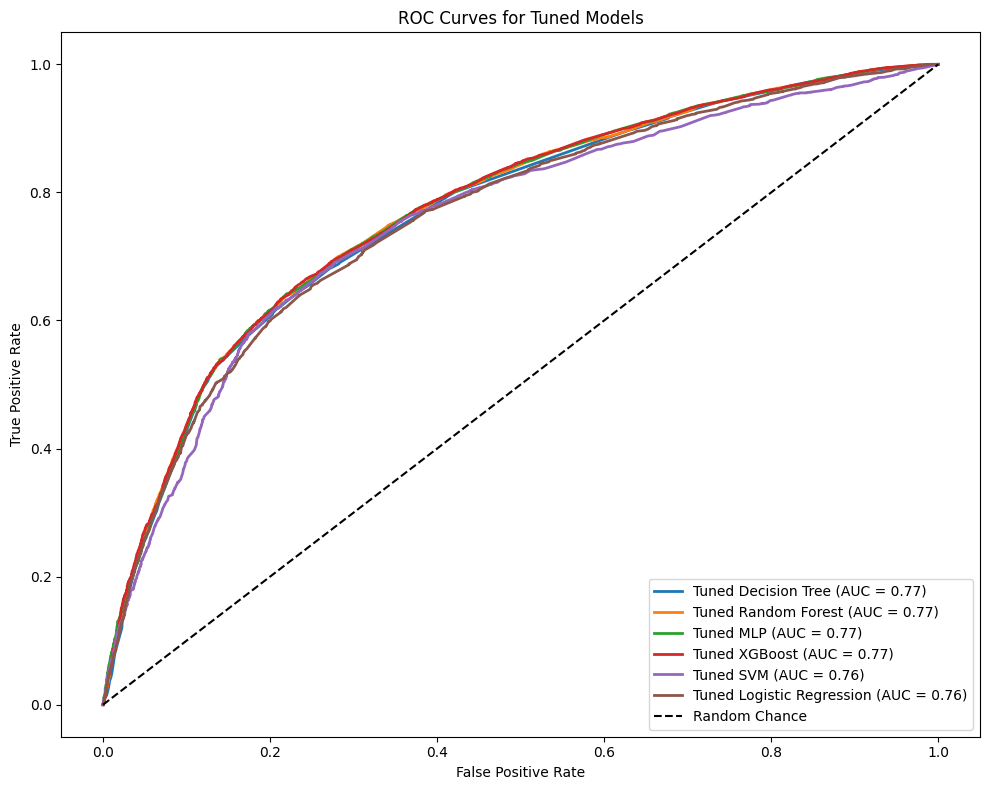

In [67]:
plt.figure(figsize=(10, 8))

plot_model_roc(y_test, dtree_probs, "Tuned Decision Tree")
plot_model_roc(y_test, rf_probs, "Tuned Random Forest")
plot_model_roc(y_test, mlp_probs, "Tuned MLP")
plot_model_roc(y_test, xgb_probs, "Tuned XGBoost")
plot_model_roc(y_test, svm_probs, "Tuned SVM")
plot_model_roc(y_test, logreg_probs, "Tuned Logistic Regression")

# reference line
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Tuned Models")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
%pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ea9d5fe799d1b6f7cd90baa7b8b40ea8ecf203e81e36617c022579a6b75dd4d5
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular


explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_imputed,
    feature_names=X.columns,
    class_names=["No Cardio", "Cardio"],
    discretize_continuous=True,
    mode="classification"
)


i = 0
exp = explainer.explain_instance(
    X_test_imputed[i],
    xgb_best.predict_proba,
    num_features=10
)

# LIME explanation
exp.show_in_notebook(show_table=True)


In [ ]:
%pip install shap

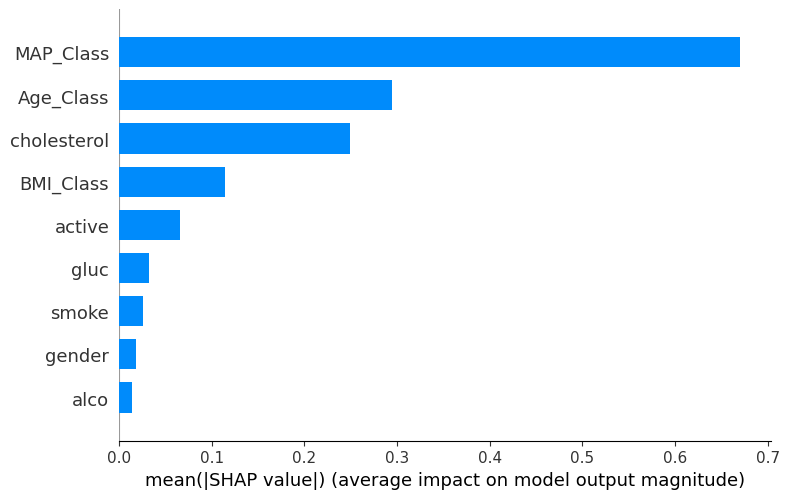

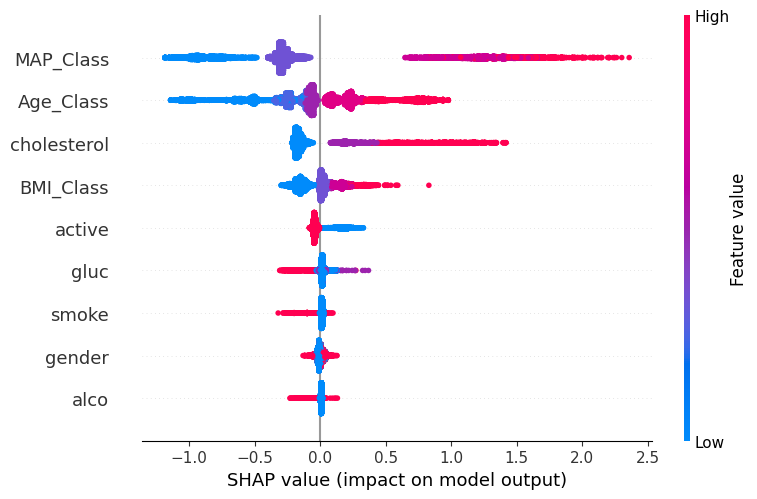

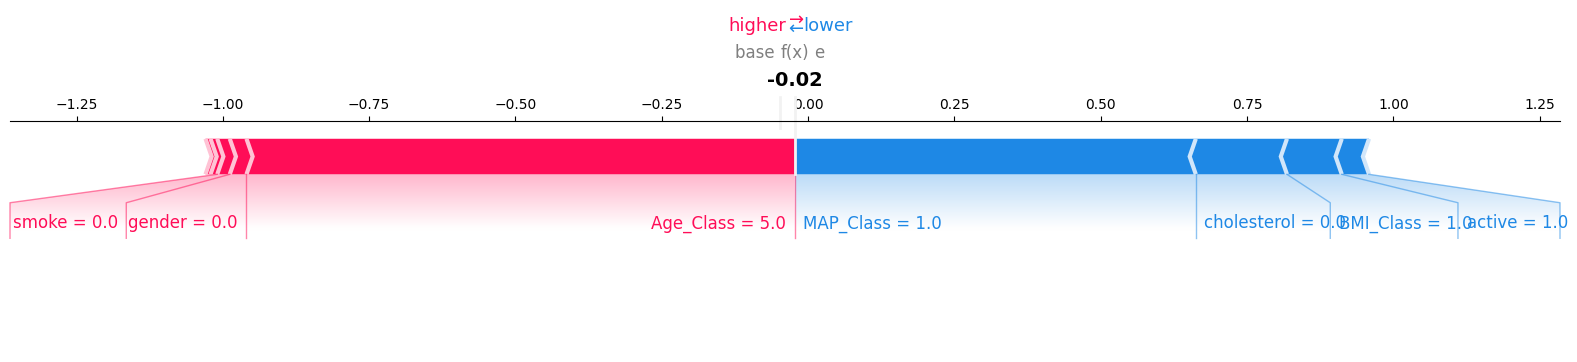

In [ ]:
import shap


explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_test_imputed)

shap.summary_plot(
    shap_values,
    X_test_imputed,
    feature_names=X.columns,
    plot_type="bar",
    show=True
)

shap.summary_plot(
    shap_values,
    X_test_imputed,
    feature_names=X.columns,
    show=True
)

shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test_imputed[i],
    feature_names=X.columns,
    matplotlib=True
)
